In [144]:
import pandas as pd
import numpy as np
import statistics as stats
import matplotlib.pyplot as plt


df_offensive = pd.read_csv("Seasons_Stats.csv")
df_heights = pd.read_csv("player_data.csv")
df_2012 = pd.read_csv("season_2011_2012.csv")
df_2013 = pd.read_csv("season_2012_2013.csv")
df_2014 = pd.read_csv("season_2013_2014.csv")
df_2015 = pd.read_csv("season_2014_2015.csv")
df_2016 = pd.read_csv("season_2015_2016.csv")
df_2017 = pd.read_csv("season_2016_2017.csv")

df_heights = df_heights[['name', 'height']]
df_offensive = df_offensive[['Year', 'Player', 'PTS', 'TOV', 'AST', '3P%', 'FG%', 'G']]
df_total = df_heights.merge(df_offensive, how='left', left_on='name', right_on='Player')

df_2012['year'] = 2012.0
df_2013['year'] = 2013.0
df_2014['year'] = 2014.0
df_2015['year'] = 2015.0
df_2016['year'] = 2016.0
df_2017['year'] = 2017.0

df_total_year = pd.concat([df_2012, df_2013, df_2014, df_2015, df_2016, df_2017])
df_total = df_total_year.merge(df_total, how='inner', left_on=['player', 'year'], right_on=['name', 'Year'])
df_total['PTSPG'] = df_total['PTS'] / df_total['G']
df_total['TOVPG'] = df_total['TOV'] / df_total['G']
df_total['ASTPG'] = df_total['AST'] / df_total['G']
df_total = df_total[['player', 'year', 'height', 'defense rating', 'PTSPG', 'TOVPG', 'ASTPG', '3P%', 'FG%']]

def height_fix(height) :
    height_split = height.split('-')
    total = (int(height_split[0]) * 12) + int(height_split[1])
    return total

df_total['height'] = df_total['height'].apply(height_fix)
def mean_calc(year, df) :
    mean_array = []
    for height in range(60, 100) :
        df_curr = df.loc[(df['year'] == year) & (df['height'] == height)]
        if df_curr.empty :
            continue
        mean = df_curr.mean()
        mean_array.append([height, mean['defense rating'], mean['PTSPG'], mean['TOVPG'], mean['ASTPG'], mean['3P%'], mean['FG%']])
    return mean_array
        
df_2012_mean = pd.DataFrame(data=mean_calc(2012.0, df_total), columns=['height', 'defense rating', 'PTSPG', 'TOVPG', 'ASTPG', '3P%', 'FG%'])
df_2013_mean = pd.DataFrame(data=mean_calc(2013.0, df_total), columns=['height', 'defense rating', 'PTSPG', 'TOVPG', 'ASTPG', '3P%', 'FG%'])
df_2014_mean = pd.DataFrame(data=mean_calc(2014.0, df_total), columns=['height', 'defense rating', 'PTSPG', 'TOVPG', 'ASTPG', '3P%', 'FG%'])
df_2015_mean = pd.DataFrame(data=mean_calc(2015.0, df_total), columns=['height', 'defense rating', 'PTSPG', 'TOVPG', 'ASTPG', '3P%', 'FG%'])
df_2016_mean = pd.DataFrame(data=mean_calc(2016.0, df_total), columns=['height', 'defense rating', 'PTSPG', 'TOVPG', 'ASTPG', '3P%', 'FG%'])
df_2017_mean = pd.DataFrame(data=mean_calc(2017.0, df_total), columns=['height', 'defense rating', 'PTSPG', 'TOVPG', 'ASTPG', '3P%', 'FG%'])

In [145]:
df_2012 = df_2012_mean
df_2012_sort = df_2012.sort_values(['height'])


df_2012_height = df_2012_sort['height']
df_2012_points = df_2012_sort['PTSPG']
df_2012_defense = df_2012_sort['defense rating']
df_2012_turnover = df_2012_sort['TOVPG']
df_2012_3percent = df_2012_sort['3P%']
df_2012_FGpercent = df_2012_sort['FG%']
df_2012_assist = df_2012_sort['ASTPG']



In [146]:
df_2013 = df_2013_mean
df_2013_sort = df_2013.sort_values(['height'])

df_2013_height = df_2013_sort['height']
df_2013_points = df_2013_sort['PTSPG']
df_2013_defense = df_2013_sort['defense rating']
df_2013_turnover = df_2013_sort['TOVPG']
df_2013_3percent = df_2013_sort['3P%']
df_2013_FGpercent = df_2013_sort['FG%']
df_2013_assist = df_2013_sort['ASTPG']


In [147]:
df_2014 = df_2014_mean
df_2014_sort = df_2014.sort_values(['height'])

df_2014_height = df_2014_sort['height']
df_2014_points = df_2014_sort['PTSPG']
df_2014_defense = df_2014_sort['defense rating']
df_2014_turnover = df_2014_sort['TOVPG']
df_2014_3percent = df_2014_sort['3P%']
df_2014_FGpercent = df_2014_sort['FG%']
df_2014_assist = df_2014_sort['ASTPG']

In [148]:
df_2015 = df_2015_mean
df_2015_sort = df_2015.sort_values(['height'])

df_2015_height = df_2015_sort['height']
df_2015_points = df_2015_sort['PTSPG']
df_2015_defense = df_2015_sort['defense rating']
df_2015_turnover = df_2015_sort['TOVPG']
df_2015_3percent = df_2015_sort['3P%']
df_2015_FGpercent = df_2015_sort['FG%']
df_2015_assist = df_2015_sort['ASTPG']

In [149]:
df_2016 = df_2016_mean
df_2016_sort = df_2016.sort_values(['height'])

df_2016_height = df_2016_sort['height']
df_2016_points = df_2016_sort['PTSPG']
df_2016_defense = df_2016_sort['defense rating']
df_2016_turnover = df_2016_sort['TOVPG']
df_2016_3percent = df_2016_sort['3P%']
df_2016_FGpercent = df_2016_sort['FG%']
df_2016_assist = df_2016_sort['ASTPG']


In [150]:
df_2017 = df_2017_mean
df_2017_sort = df_2017.sort_values(['height'])

df_2017_height = df_2017_sort['height']
df_2017_points = df_2017_sort['PTSPG']
df_2017_defense = df_2017_sort['defense rating']
df_2017_turnover = df_2017_sort['TOVPG']
df_2017_3percent = df_2017_sort['3P%']
df_2017_FGpercent = df_2017_sort['FG%']
df_2017_assist = df_2017_sort['ASTPG']

In [151]:
def normalize_signal(s):
        norm_signal = (s - np.min(s))/(np.max(s)-np.min(s))
        return norm_signal

In [152]:
norm_points_2012 = normalize_signal(df_2012_points)
std_points_2012 = np.std(norm_points_2012)
print("standard deviation of points of 2012:",std_points_2012)

norm_assist_2012 = normalize_signal(df_2012_assist)
std_assist_2012 = np.std(norm_assist_2012)
print("standard deviation of assist of 2012:",std_points_2012)

norm_to_2012 = normalize_signal(df_2012_turnover)
std_to_2012 = np.std(df_2012_turnover)
print("standard deviation of turnovers of 2012:",std_points_2012)

norm_def_2012 = normalize_signal(df_2012_defense)
std_def_2012 = np.std(norm_def_2012)
print("standard deviation of defense rating of 2012:",std_def_2012)

norm_fg_2012 = normalize_signal(df_2012_FGpercent)
std_fg_2012 = np.std(norm_fg_2012)
print("standard deviation of Field goal percent of 2012:",std_fg_2012)

norm_3point_2012 = normalize_signal(df_2012_3percent)
std_3s_2012 = np.std(norm_3point_2012)
print("standard deviation of 3point percent of 2012:",std_3s_2012)

std_2012 = std_points_2012
std_2012 = np.vstack((std_2012,std_assist_2012,std_to_2012,std_def_2012,std_fg_2012,std_3s_2012))
print(std_2012)

standard deviation of points of 2012: 0.2844273356140558
standard deviation of assist of 2012: 0.2844273356140558
standard deviation of turnovers of 2012: 0.2844273356140558
standard deviation of defense rating of 2012: 0.3416231328439348
standard deviation of Field goal percent of 2012: 0.24705698497826994
standard deviation of 3point percent of 2012: 0.32395508764539976
[[0.28442734]
 [0.38999349]
 [0.42879912]
 [0.34162313]
 [0.24705698]
 [0.32395509]]


In [153]:
norm_points_2013 = normalize_signal(df_2013_points)
std_points_2013 = np.std(norm_points_2013)
print("standard deviation of points of 2013:",std_points_2012)

norm_assist_2013 = normalize_signal(df_2013_assist)
std_assist_2013 = np.std(norm_assist_2013)
print("standard deviation of assist of 2013:",std_points_2012)

norm_to_2013 = normalize_signal(df_2013_turnover)
std_to_2013 = np.std(norm_to_2013)
print("standard deviation of turnovers of 2013:",std_to_2013)

norm_def_2013 = normalize_signal(df_2013_defense)
std_def_2013 = np.std(norm_def_2013)
print("standard deviation of defense rating of 2013:",std_def_2013)

norm_fg_2013 = normalize_signal(df_2013_FGpercent)
std_fg_2013 = np.std(norm_fg_2013)
print("standard deviation of Field goal percent of 2013:",std_fg_2013)

norm_3point_2013 = normalize_signal(df_2013_3percent)
std_3s_2013 = np.std(norm_3point_2013)

print("standard deviation of 3point percent of 2012:",std_3s_2013)

std_2013 = std_points_2013
std_2013 = np.vstack((std_2013,std_assist_2013,std_to_2013,std_def_2013,std_fg_2013,std_3s_2013))
print(std_2013)

standard deviation of points of 2013: 0.2844273356140558
standard deviation of assist of 2013: 0.2844273356140558
standard deviation of turnovers of 2013: 0.29398718887812675
standard deviation of defense rating of 2013: 0.3148377433080756
standard deviation of Field goal percent of 2013: 0.25650222103575393
standard deviation of 3point percent of 2012: 0.2817985606588718
[[0.3026874 ]
 [0.29924674]
 [0.29398719]
 [0.31483774]
 [0.25650222]
 [0.28179856]]


In [154]:
norm_points_2014 = normalize_signal(df_2014_points)
std_points_2014 = np.std(norm_points_2014)
print("standard deviation of points of 2014:",std_points_2014)

norm_assist_2014 = normalize_signal(df_2014_assist)
std_assist_2014 = np.std(norm_assist_2014)
print("standard deviation of assist of 2014:",std_assist_2014)

norm_to_2014 = normalize_signal(df_2014_turnover)
std_to_2014 = np.std(norm_to_2014)
print("standard deviation of turnovers of 2014:",std_to_2014)

norm_def_2014 = normalize_signal(df_2014_defense)
std_def_2014 = np.std(norm_def_2014)
print("standard deviation of defense rating of 2014:",std_def_2014)

norm_fg_2014 = normalize_signal(df_2014_FGpercent)
std_fg_2014 = np.std(norm_fg_2014)
print("standard deviation of Field goal percent of 2014:",std_fg_2014)

norm_3point_2014 = normalize_signal(df_2014_3percent)
std_3s_2014 = np.std(norm_3point_2014)
print("standard deviation of 3point percent of 2014:",std_3s_2014)


std_2014 = std_points_2014
std_2014 = np.vstack((std_2014,std_assist_2014,std_to_2014,std_def_2014,std_fg_2014,std_3s_2014))
print(std_2014)

standard deviation of points of 2014: 0.2692018347866771
standard deviation of assist of 2014: 0.2655628626170763
standard deviation of turnovers of 2014: 0.30933629804361346
standard deviation of defense rating of 2014: 0.2485600218853465
standard deviation of Field goal percent of 2014: 0.31537668899621507
standard deviation of 3point percent of 2014: 0.27747752559107564
[[0.26920183]
 [0.26556286]
 [0.3093363 ]
 [0.24856002]
 [0.31537669]
 [0.27747753]]


In [155]:
norm_points_2015 = normalize_signal(df_2015_points)
std_points_2015 = np.std(norm_points_2015)
print("standard deviation of points of 2015:",std_points_2015)

norm_assist_2015 = normalize_signal(df_2015_assist)
std_assist_2015 = np.std(norm_assist_2015)
print("standard deviation of assist of 2015:",std_assist_2015)

norm_to_2015 = normalize_signal(df_2015_turnover)
std_to_2015 = np.std(norm_to_2015)
print("standard deviation of turnovers of 2015:",std_to_2015)

norm_def_2015 = normalize_signal(df_2015_defense)
std_def_2015 = np.std(norm_def_2015)
print("standard deviation of defense rating of 2015:",std_def_2015)

norm_fg_2015 = normalize_signal(df_2015_FGpercent)
std_fg_2015 = np.std(norm_fg_2015)
print("standard deviation of Field goal percent of 2015:",std_fg_2015)

norm_3point_2015 = normalize_signal(df_2015_3percent)
std_3s_2015 = np.std(norm_3point_2015)
print("standard deviation of 3point percent of 2015:",std_3s_2015)


std_2015 = std_points_2015
std_2015 = np.vstack((std_2015,std_assist_2015,std_to_2015,std_def_2015,std_fg_2015,std_3s_2015))
print(std_2015)

standard deviation of points of 2015: 0.3494932795682767
standard deviation of assist of 2015: 0.28040826500706795
standard deviation of turnovers of 2015: 0.2679313275033318
standard deviation of defense rating of 2015: 0.2772600451735744
standard deviation of Field goal percent of 2015: 0.32456437408752115
standard deviation of 3point percent of 2015: 0.2781065669663091
[[0.34949328]
 [0.28040827]
 [0.26793133]
 [0.27726005]
 [0.32456437]
 [0.27810657]]


In [156]:
norm_points_2016 = normalize_signal(df_2016_points)
std_points_2016 = np.std(norm_points_2016)
print("standard deviation of points of 2016:",std_points_2016)

norm_assist_2016 = normalize_signal(df_2016_assist)
std_assist_2016 = np.std(norm_assist_2016)
print("standard deviation of assist of 2016:",std_assist_2016)

norm_to_2016 = normalize_signal(df_2016_turnover)
std_to_2016 = np.std(norm_to_2016)
print("standard deviation of turnovers of 2016:",std_to_2016)

norm_def_2016 = normalize_signal(df_2016_defense)
std_def_2016 = np.std(norm_def_2016)
print("standard deviation of defense rating of 2016:",std_def_2016)

norm_fg_2016 = normalize_signal(df_2016_FGpercent)
std_fg_2016 = np.std(norm_fg_2016)
print("standard deviation of Field goal percent of 2016:",std_fg_2016)

norm_3point_2016 = normalize_signal(df_2016_3percent)
std_3s_2016 = np.std(norm_3point_2016)
print("standard deviation of 3point percent of 2016:",std_3s_2016)

std_2016 = std_points_2016
std_2016 = np.vstack((std_2016,std_assist_2016,std_to_2016,std_def_2016,std_fg_2016,std_3s_2016))
print(std_2016)

standard deviation of points of 2016: 0.3278068130709026
standard deviation of assist of 2016: 0.3011462675237656
standard deviation of turnovers of 2016: 0.3584660044535728
standard deviation of defense rating of 2016: 0.2629370585542837
standard deviation of Field goal percent of 2016: 0.2899123972388231
standard deviation of 3point percent of 2016: 0.26228254130800593
[[0.32780681]
 [0.30114627]
 [0.358466  ]
 [0.26293706]
 [0.2899124 ]
 [0.26228254]]


In [157]:
norm_points_2017 = normalize_signal(df_2017_points)
std_points_2017 = np.std(norm_points_2017)
print("standard deviation of points of 2017:",std_points_2017)

norm_assist_2017 = normalize_signal(df_2017_assist)
std_assist_2017 = np.std(norm_assist_2017)
print("standard deviation of assist of 2017:",std_assist_2017)

norm_to_2017 = normalize_signal(df_2017_turnover)
std_to_2017 = np.std(norm_to_2017)
print("standard deviation of turnovers of 2017:",std_to_2017)

norm_def_2017 = normalize_signal(df_2017_defense)
std_def_2017 = np.std(norm_def_2017)
print("standard deviation of defense rating of 2017:",std_def_2017)

norm_fg_2017 = normalize_signal(df_2017_FGpercent)
std_fg_2017 = np.std(norm_fg_2017)
print("standard deviation of Field goal percent of 2017:",std_fg_2017)

norm_3point_2017 = normalize_signal(df_2017_3percent)
std_3s_2017 = np.std(norm_3point_2017)
print("standard deviation of 3point percent of 2017:",std_3s_2017)


std_2017 = std_points_2017
std_2017 = np.vstack((std_2017,std_assist_2017,std_to_2017,std_def_2017,std_fg_2017,std_3s_2017))
print(std_2017)

standard deviation of points of 2017: 0.258174711943828
standard deviation of assist of 2017: 0.33565783641597075
standard deviation of turnovers of 2017: 0.29897653238965605
standard deviation of defense rating of 2017: 0.30161812913013364
standard deviation of Field goal percent of 2017: 0.24498236585533362
standard deviation of 3point percent of 2017: 0.3138910662041089
[[0.25817471]
 [0.33565784]
 [0.29897653]
 [0.30161813]
 [0.24498237]
 [0.31389107]]


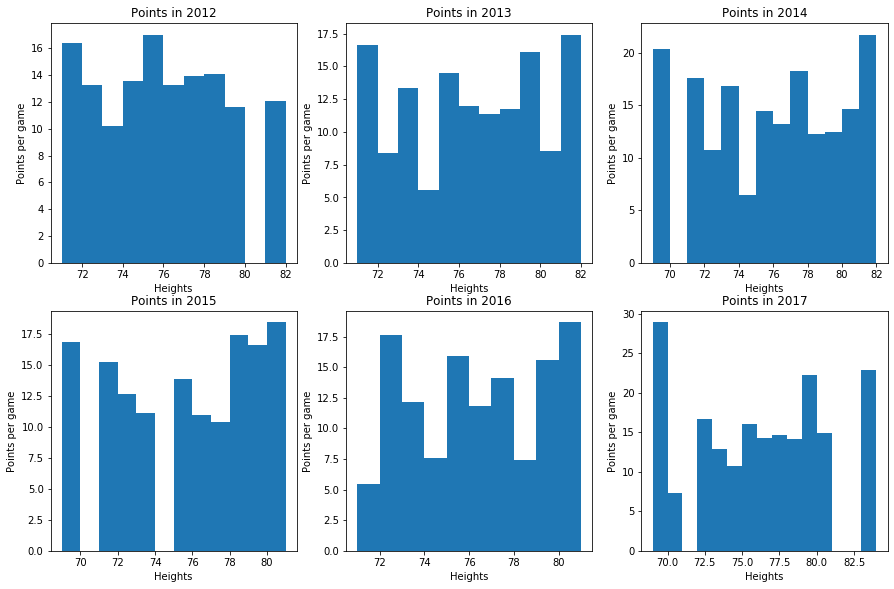

In [158]:
plt.figure(figsize = (15,15))

plt.subplot(3,3,1)
plt.title("Points in 2012")
plt.xlabel("Heights")
plt.ylabel("Points per game")
plt.bar(x = df_2012_height, height = df_2012_points,width = 1, align  = 'edge')

plt.subplot(3,3,2)
plt.title("Points in 2013")
plt.xlabel("Heights")
plt.ylabel("Points per game")
plt.bar(x = df_2013_height, height = df_2013_points,width = 1, align  = 'edge')


plt.subplot(3,3,3)
plt.title("Points in 2014")
plt.xlabel("Heights")
plt.ylabel("Points per game")
plt.bar(x = df_2014_height, height = df_2014_points,width = 1, align  = 'edge')


plt.subplot(3,3,4)
plt.title("Points in 2015")
plt.xlabel("Heights")
plt.ylabel("Points per game")
plt.bar(x = df_2015_height, height = df_2015_points,width = 1, align  = 'edge')


plt.subplot(3,3,5)
plt.title("Points in 2016")
plt.xlabel("Heights")
plt.ylabel("Points per game")
plt.bar(x = df_2016_height, height = df_2016_points,width = 1, align  = 'edge')


plt.subplot(3,3,6)
plt.title("Points in 2017")
plt.xlabel("Heights")
plt.ylabel("Points per game")
plt.bar(x = df_2017_height, height = df_2017_points,width = 1, align  = 'edge')


plt.show()


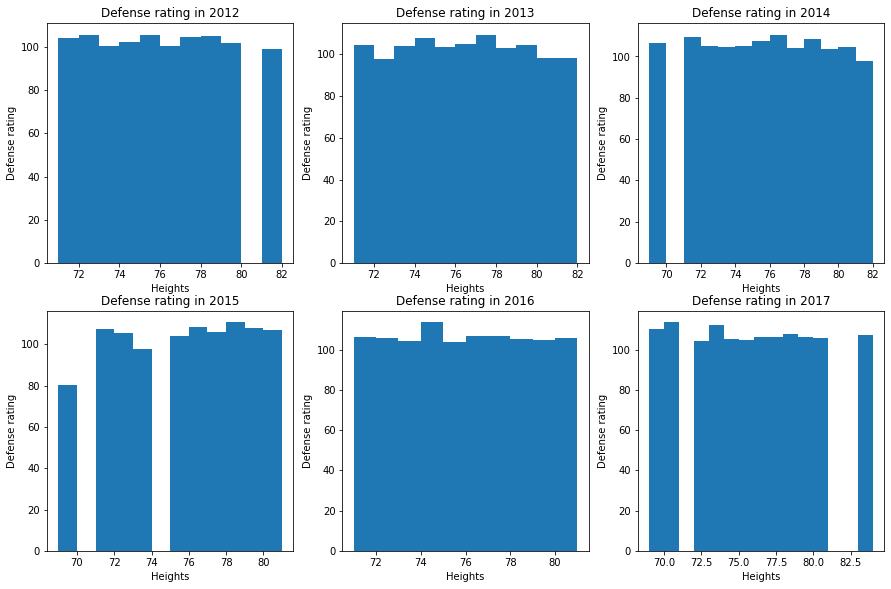

In [159]:
plt.figure(figsize = (15,15))

plt.subplot(3,3,1)
plt.title("Defense rating in 2012")
plt.xlabel("Heights")
plt.ylabel("Defense rating")
plt.bar(x = df_2012_height, height = df_2012_defense,width = 1, align  = 'edge')

plt.subplot(3,3,2)
plt.title("Defense rating in 2013")
plt.xlabel("Heights")
plt.ylabel("Defense rating")
plt.bar(x = df_2013_height, height = df_2013_defense,width = 1, align  = 'edge')


plt.subplot(3,3,3)
plt.title("Defense rating in 2014")
plt.xlabel("Heights")
plt.ylabel("Defense rating")
plt.bar(x = df_2014_height, height = df_2014_defense,width = 1, align  = 'edge')


plt.subplot(3,3,4)
plt.title("Defense rating in 2015")
plt.xlabel("Heights")
plt.ylabel("Defense rating")
plt.bar(x = df_2015_height, height = df_2015_defense,width = 1, align  = 'edge')


plt.subplot(3,3,5)
plt.title("Defense rating in 2016")
plt.xlabel("Heights")
plt.ylabel("Defense rating")
plt.bar(x = df_2016_height, height = df_2016_defense,width = 1, align  = 'edge')


plt.subplot(3,3,6)
plt.title("Defense rating in 2017")
plt.xlabel("Heights")
plt.ylabel("Defense rating")
plt.bar(x = df_2017_height, height = df_2017_defense,width = 1, align  = 'edge')




plt.show()


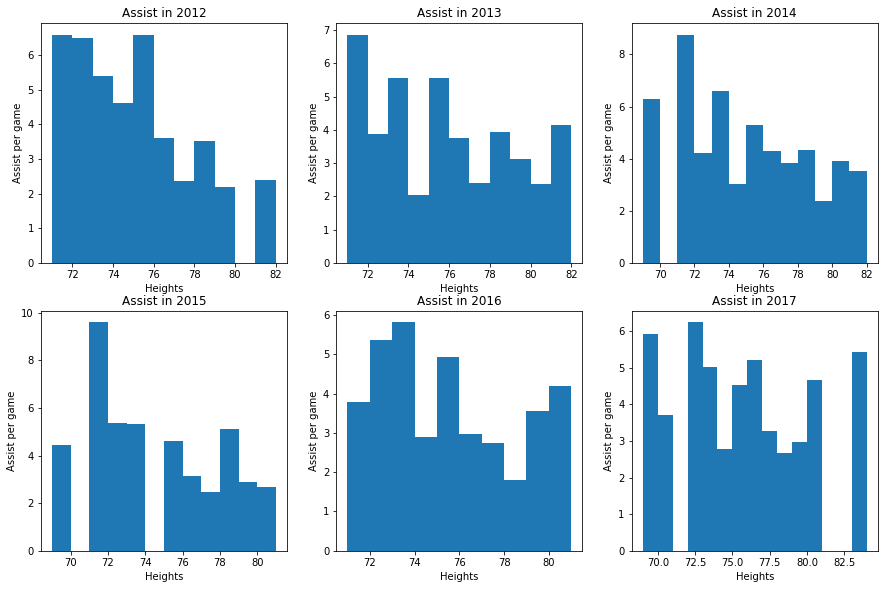

In [160]:
plt.figure(figsize = (15,15))

plt.subplot(3,3,1)
plt.title("Assist in 2012")
plt.xlabel("Heights")
plt.ylabel("Assist per game")
plt.bar(x = df_2012_height, height = df_2012_assist,width = 1, align  = 'edge')

plt.subplot(3,3,2)
plt.title("Assist in 2013")
plt.xlabel("Heights")
plt.ylabel("Assist per game")
plt.bar(x = df_2013_height, height = df_2013_assist,width = 1, align  = 'edge')


plt.subplot(3,3,3)
plt.title("Assist in 2014")
plt.xlabel("Heights")
plt.ylabel("Assist per game")
plt.bar(x = df_2014_height, height = df_2014_assist,width = 1, align  = 'edge')


plt.subplot(3,3,4)
plt.title("Assist in 2015")
plt.xlabel("Heights")
plt.ylabel("Assist per game")
plt.bar(x = df_2015_height, height = df_2015_assist,width = 1, align  = 'edge')


plt.subplot(3,3,5)
plt.title("Assist in 2016")
plt.xlabel("Heights")
plt.ylabel("Assist per game")
plt.bar(x = df_2016_height, height = df_2016_assist,width = 1, align  = 'edge')


plt.subplot(3,3,6)
plt.title("Assist in 2017")
plt.xlabel("Heights")
plt.ylabel("Assist per game")
plt.bar(x = df_2017_height, height = df_2017_assist,width = 1, align  = 'edge')




plt.show()

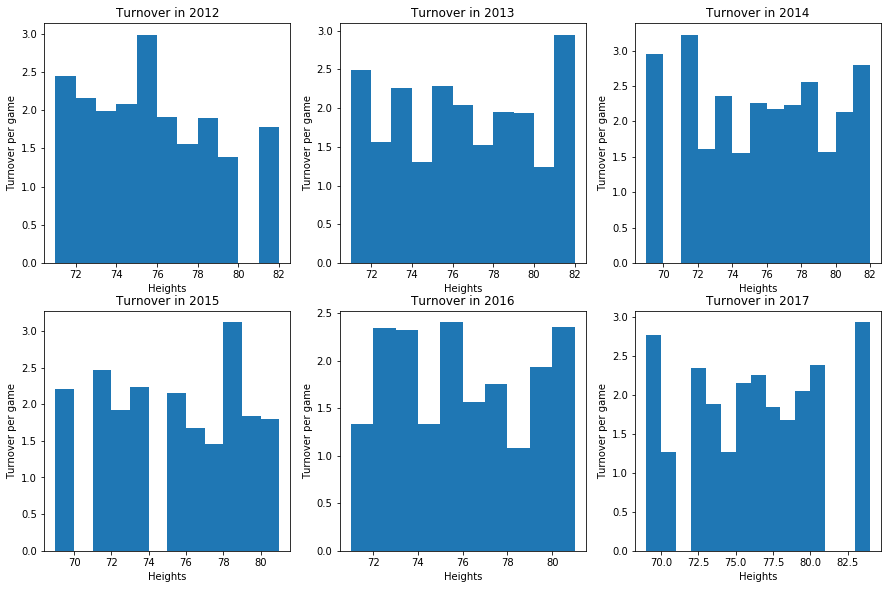

In [161]:
plt.figure(figsize = (15,15))

plt.subplot(3,3,1)
plt.title("Turnover in 2012")
plt.xlabel("Heights")
plt.ylabel("Turnover per game")
plt.bar(x = df_2012_height, height = df_2012_turnover,width = 1, align  = 'edge')

plt.subplot(3,3,2)
plt.title("Turnover in 2013")
plt.xlabel("Heights")
plt.ylabel("Turnover per game")
plt.bar(x = df_2013_height, height = df_2013_turnover,width = 1, align  = 'edge')


plt.subplot(3,3,3)
plt.title("Turnover in 2014")
plt.xlabel("Heights")
plt.ylabel("Turnover per game")
plt.bar(x = df_2014_height, height = df_2014_turnover,width = 1, align  = 'edge')


plt.subplot(3,3,4)
plt.title("Turnover in 2015")
plt.xlabel("Heights")
plt.ylabel("Turnover per game")
plt.bar(x = df_2015_height, height = df_2015_turnover,width = 1, align  = 'edge')


plt.subplot(3,3,5)
plt.title("Turnover in 2016")
plt.xlabel("Heights")
plt.ylabel("Turnover per game")
plt.bar(x = df_2016_height, height = df_2016_turnover,width = 1, align  = 'edge')


plt.subplot(3,3,6)
plt.title("Turnover in 2017")
plt.xlabel("Heights")
plt.ylabel("Turnover per game")
plt.bar(x = df_2017_height, height = df_2017_turnover,width = 1, align  = 'edge')




plt.show()

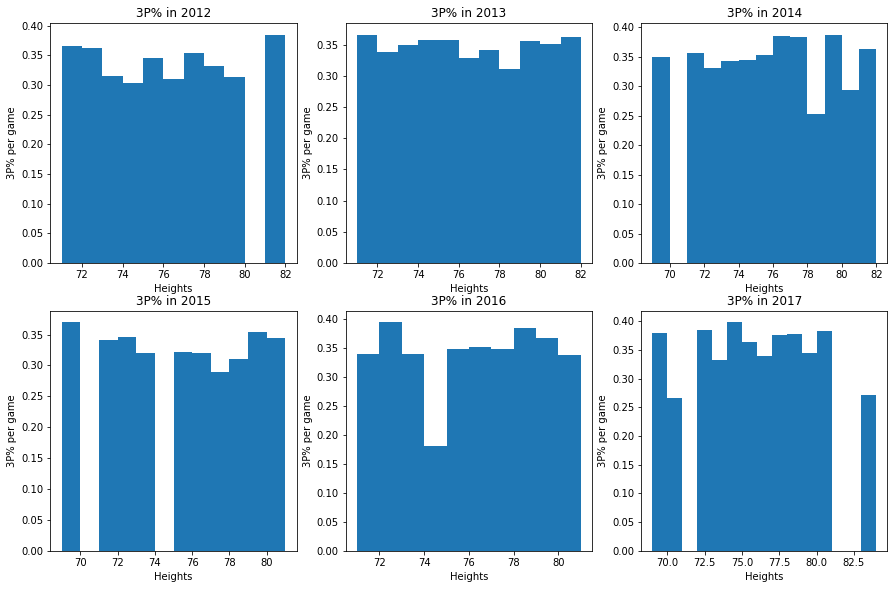

In [162]:
plt.figure(figsize = (15,15))

plt.subplot(3,3,1)
plt.title("3P% in 2012")
plt.xlabel("Heights")
plt.ylabel("3P% per game")
plt.bar(x = df_2012_height, height = df_2012_3percent,width = 1, align  = 'edge')

plt.subplot(3,3,2)
plt.title("3P% in 2013")
plt.xlabel("Heights")
plt.ylabel("3P% per game")
plt.bar(x = df_2013_height, height = df_2013_3percent,width = 1, align  = 'edge')


plt.subplot(3,3,3)
plt.title("3P% in 2014")
plt.xlabel("Heights")
plt.ylabel("3P% per game")
plt.bar(x = df_2014_height, height = df_2014_3percent,width = 1, align  = 'edge')


plt.subplot(3,3,4)
plt.title("3P% in 2015")
plt.xlabel("Heights")
plt.ylabel("3P% per game")
plt.bar(x = df_2015_height, height = df_2015_3percent,width = 1, align  = 'edge')


plt.subplot(3,3,5)
plt.title("3P% in 2016")
plt.xlabel("Heights")
plt.ylabel("3P% per game")
plt.bar(x = df_2016_height, height = df_2016_3percent,width = 1, align  = 'edge')


plt.subplot(3,3,6)
plt.title("3P% in 2017")
plt.xlabel("Heights")
plt.ylabel("3P% per game")
plt.bar(x = df_2017_height, height = df_2017_3percent,width = 1, align  = 'edge')







plt.show()

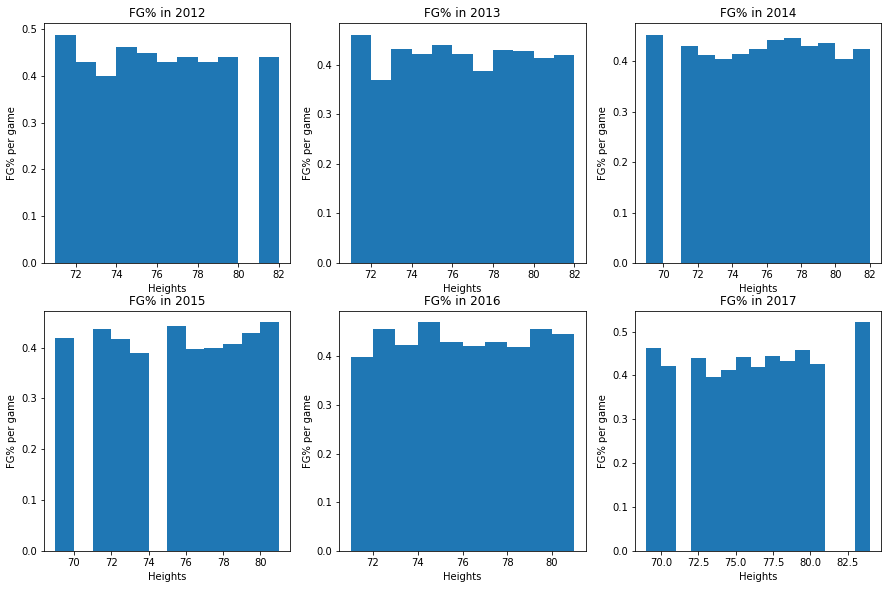

In [163]:
plt.figure(figsize = (15,15))

plt.subplot(3,3,1)
plt.title("FG% in 2012")
plt.xlabel("Heights")
plt.ylabel("FG% per game")
plt.bar(x = df_2012_height, height = df_2012_FGpercent,width = 1, align  = 'edge')

plt.subplot(3,3,2)
plt.title("FG% in 2013")
plt.xlabel("Heights")
plt.ylabel("FG% per game")
plt.bar(x = df_2013_height, height = df_2013_FGpercent,width = 1, align  = 'edge')


plt.subplot(3,3,3)
plt.title("FG% in 2014")
plt.xlabel("Heights")
plt.ylabel("FG% per game")
plt.bar(x = df_2014_height, height = df_2014_FGpercent,width = 1, align  = 'edge')


plt.subplot(3,3,4)
plt.title("FG% in 2015")
plt.xlabel("Heights")
plt.ylabel("FG% per game")
plt.bar(x = df_2015_height, height = df_2015_FGpercent,width = 1, align  = 'edge')


plt.subplot(3,3,5)
plt.title("FG% in 2016")
plt.xlabel("Heights")
plt.ylabel("FG% per game")
plt.bar(x = df_2016_height, height = df_2016_FGpercent,width = 1, align  = 'edge')


plt.subplot(3,3,6)
plt.title("FG% in 2017")
plt.xlabel("Heights")
plt.ylabel("FG% per game")
plt.bar(x = df_2017_height, height = df_2017_FGpercent,width = 1, align  = 'edge')







plt.show()



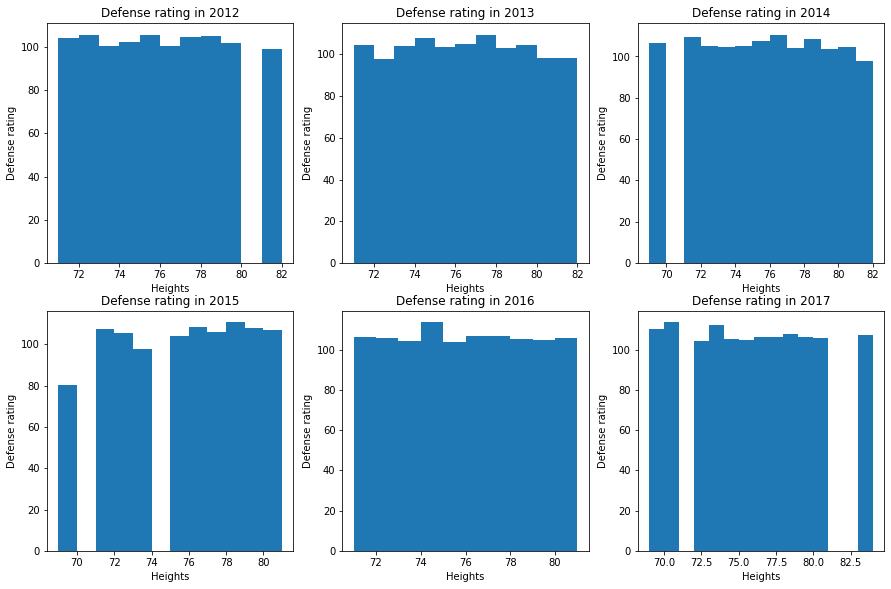

In [164]:
plt.figure(figsize = (15,15))

plt.subplot(3,3,1)
plt.title("Defense rating in 2012")
plt.xlabel("Heights")
plt.ylabel("Defense rating")
plt.bar(x = df_2012_height, height = df_2012_defense,width = 1, align  = 'edge')

plt.subplot(3,3,2)
plt.title("Defense rating in 2013")
plt.xlabel("Heights")
plt.ylabel("Defense rating")
plt.bar(x = df_2013_height, height = df_2013_defense,width = 1, align  = 'edge')


plt.subplot(3,3,3)
plt.title("Defense rating in 2014")
plt.xlabel("Heights")
plt.ylabel("Defense rating")
plt.bar(x = df_2014_height, height = df_2014_defense,width = 1, align  = 'edge')


plt.subplot(3,3,4)
plt.title("Defense rating in 2015")
plt.xlabel("Heights")
plt.ylabel("Defense rating")
plt.bar(x = df_2015_height, height = df_2015_defense,width = 1, align  = 'edge')


plt.subplot(3,3,5)
plt.title("Defense rating in 2016")
plt.xlabel("Heights")
plt.ylabel("Defense rating")
plt.bar(x = df_2016_height, height = df_2016_defense,width = 1, align  = 'edge')


plt.subplot(3,3,6)
plt.title("Defense rating in 2017")
plt.xlabel("Heights")
plt.ylabel("Defense rating")
plt.bar(x = df_2017_height, height = df_2017_defense,width = 1, align  = 'edge')




plt.show()


In [165]:
class Weights:
    
    def __init__(self,points,assist,three_point_percent,field_goal_percent,turnover,defense,std):
        self.points = points
        self.assist = assist
        self.three_point_percent = three_point_percent
        self.field_goal_percent = field_goal_percent
        self.turnover = turnover
        self.defense = defense
        self.std = std
        
    def point(self):
        self.points = self.points * self.std[0] 
         
    def assists(self):
        self.assist = self.assist * self.std[1]
    
    def three_percent(self):
        self.three_point_percent = self.three_point_percent * self.std[5]
        
    def field_percent(self):
        self.field_goal_percent = self.field_goal_percent * self.std[4]
        
    def turnovers(self):
        self.turnover = self.turnover * self.std[2]
        
    def defense_rating(self):
        self.defense = self.defense * self.std[3]
        
    def weight_calculation(self):
        weight = self.points + self.assist + self.three_point_percent + self.field_goal_percent + self.turnover + self.defense
        return weight
        

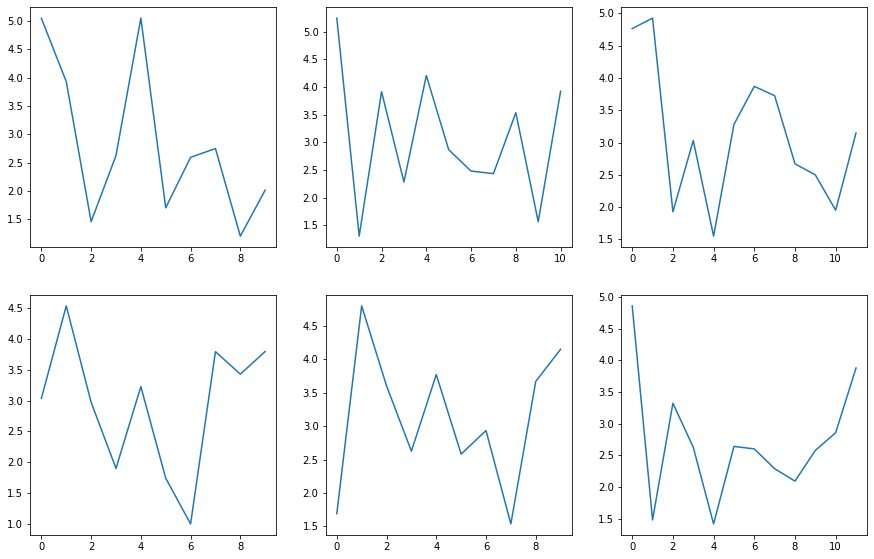

In [166]:
#convert data frame into numpy array for caculation of total weights
"""
norm_points_2012
norm_assist_2012
norm_to_2012
norm_def_2012
norm_fg_2012
norm_3point_2012

"""
norm_points_2012 = np.array(norm_points_2012)
norm_assist_2012 = np.array(norm_assist_2012)
norm_3point_2012 = np.array(norm_3point_2012)
norm_fg_2012 = np.array(norm_fg_2012)
norm_to_2012 = np.array(norm_to_2012)
norm_def_2012 = np.array(norm_def_2012)

norm_points_2013 = np.array(norm_points_2013)
norm_assist_2013 = np.array(norm_assist_2013)
norm_3point_2013 = np.array(norm_3point_2013)
norm_fg_2013 = np.array(norm_fg_2013)
norm_to_2013 = np.array(norm_to_2013)
norm_def_2013 = np.array(norm_def_2013)

norm_points_2014 = np.array(norm_points_2014)
norm_assist_2014 = np.array(norm_assist_2014)
norm_3point_2014 = np.array(norm_3point_2014)
norm_fg_2014 = np.array(norm_fg_2014)
norm_to_2014 = np.array(norm_to_2014)
norm_def_2014 = np.array(norm_def_2014)

norm_points_2015 = np.array(norm_points_2015)
norm_assist_2015 = np.array(norm_assist_2015)
norm_3point_2015 = np.array(norm_3point_2015)
norm_fg_2015 = np.array(norm_fg_2015)
norm_to_2015 = np.array(norm_to_2015)
norm_def_2015 = np.array(norm_def_2015)

norm_points_2016 = np.array(norm_points_2016)
norm_assist_2016 = np.array(norm_assist_2016)
norm_3point_2016 = np.array(norm_3point_2016)
norm_fg_2016 = np.array(norm_fg_2016)
norm_to_2016 = np.array(norm_to_2016)
norm_def_2016 = np.array(norm_def_2016)

norm_points_2017 = np.array(norm_points_2017)
norm_assist_2017 = np.array(norm_assist_2017)
norm_3point_2017 = np.array(norm_3point_2017)
norm_fg_2017 = np.array(norm_fg_2017)
norm_to_2017 = np.array(norm_to_2017)
norm_def_2017 = np.array(norm_def_2017)


weights = Weights(norm_points_2012,norm_assist_2012,norm_3point_2012,norm_fg_2012,norm_to_2012,norm_def_2012,std_2012)
poop = weights.weight_calculation()

weights2 = Weights(norm_points_2013,norm_assist_2013,norm_3point_2013,norm_fg_2013,norm_to_2013,norm_def_2013,std_2013)
poop2 = weights2.weight_calculation()

weights3 = Weights(norm_points_2014,norm_assist_2014,norm_3point_2014,norm_fg_2014,norm_to_2014,norm_def_2014,std_2014)
poop3 = weights3.weight_calculation()

weights4 = Weights(norm_points_2015,norm_assist_2015,norm_3point_2015,norm_fg_2015,norm_to_2015,norm_def_2015,std_2015)
poop4 = weights4.weight_calculation()

weights5 = Weights(norm_points_2016,norm_assist_2016,norm_3point_2016,norm_fg_2016,norm_to_2016,norm_def_2016,std_2016)
poop5 = weights5.weight_calculation()

weights6 = Weights(norm_points_2017,norm_assist_2017,norm_3point_2017,norm_fg_2017,norm_to_2017,norm_def_2017,std_2017)
poop6 = weights6.weight_calculation()

plt.figure(figsize = (15,15))
plt.subplot(3,3,1)
plt.plot(poop)

plt.subplot(3,3,2)
plt.plot(poop2)

plt.subplot(3,3,3)
plt.plot(poop3)

plt.subplot(3,3,4)
plt.plot(poop4)

plt.subplot(3,3,5)
plt.plot(poop5)

plt.subplot(3,3,6)
plt.plot(poop6)



plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

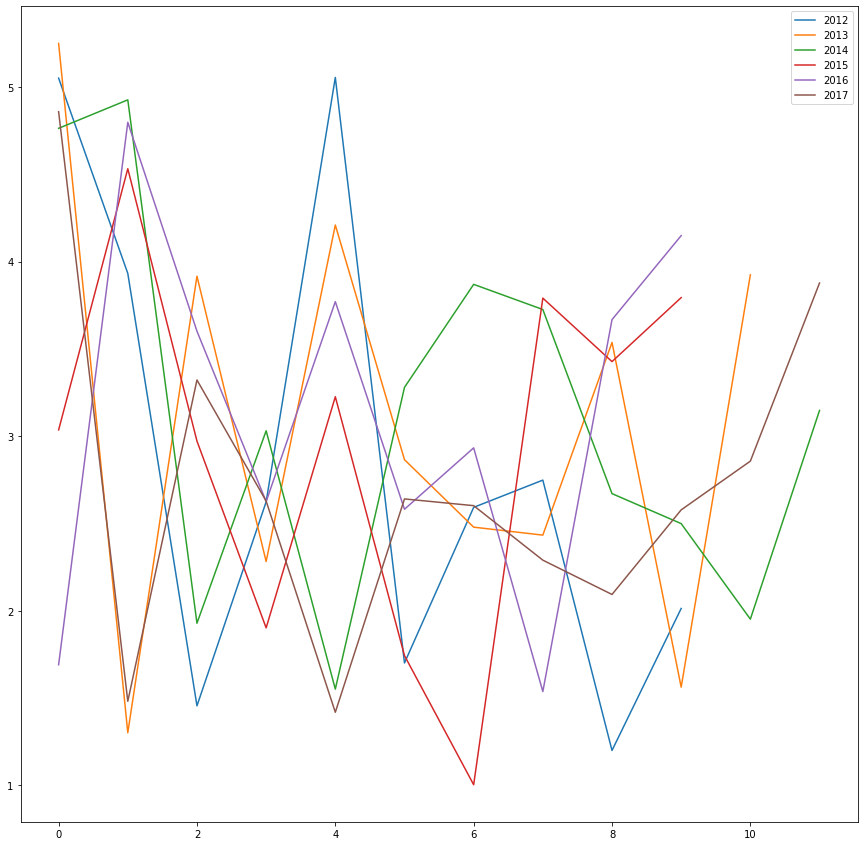

In [169]:
plt.figure(figsize = (15,15))
plt.plot(poop,label = "2012")
plt.plot(poop2,label = "2013")
plt.plot(poop3,label = "2014")
plt.plot(poop4,label = "2015")
plt.plot(poop5,label = "2016")
plt.plot(poop6,label = "2017")
plt.legend()
plt.show


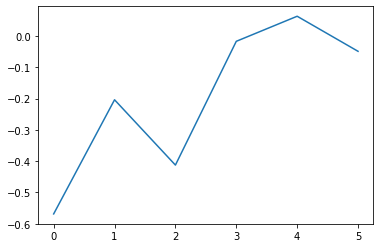

In [170]:
import scipy.stats as sc

poops = [0] * 6

poops[0] = sc.pearsonr(poop, range(0, len(poop)))[0]
poops[1] = sc.pearsonr(poop2, range(0, len(poop2)))[0]
poops[2] = sc.pearsonr(poop3, range(0, len(poop3)))[0]
poops[3] = sc.pearsonr(poop4, range(0, len(poop4)))[0]
poops[4] = sc.pearsonr(poop5, range(0, len(poop5)))[0]
poops[5] = sc.pearsonr(poop6, range(0, len(poop6)))[0]

plt.plot(poops)

In [174]:
def combine(heights, stats) :
    total = [0] * len(heights)
    for i in range(0, len(heights)) :
        total[i] = [heights[i], stats[i]]
    return total

def calc_mean(_2017, _2016, _2015, _2014, _2013, _2012) :
    combined_2017 = pd.DataFrame(data=combine(_2017[0], _2017[1]), columns=['height', '2017'])
    combined_2017 = combined_2017.set_index('height')

    combined_2016 = pd.DataFrame(data=combine(_2016[0], _2016[1]), columns=['height', '2016'])
    combined_2016 = combined_2016.set_index('height')

    combined_2015 = pd.DataFrame(data=combine(_2015[0], _2015[1]), columns=['height', '2015'])
    combined_2015 = combined_2015.set_index('height')

    combined_2014 = pd.DataFrame(data=combine(_2014[0], _2014[1]), columns=['height', '2014'])
    combined_2014 = combined_2014.set_index('height')

    combined_2013 = pd.DataFrame(data=combine(_2013[0], _2013[1]), columns=['height', '2013'])
    combined_2013 = combined_2013.set_index('height')

    combined_2012 = pd.DataFrame(data=combine(_2012[0], _2012[1]), columns=['height', '2012'])
    combined_2012 = combined_2012.set_index('height')

    total = pd.DataFrame(data=df_2017_height, columns=['height'])
    total = total.set_index('height')

    total = total.merge(combined_2017, how='left', on='height')
    total = total.merge(combined_2016, how='left', on='height')
    total = total.merge(combined_2015, how='left', on='height')
    total = total.merge(combined_2014, how='left', on='height')
    total = total.merge(combined_2013, how='left', on='height')
    total = total.merge(combined_2012, how='left', on='height')
    return pd.DataFrame(total.mean(axis=1), columns=['mean'])

points_mean = calc_mean([df_2017_height, df_2017_points], [df_2016_height, df_2016_points], [df_2015_height, df_2015_points], [df_2014_height, df_2014_points], [df_2013_height, df_2013_points], [df_2012_height, df_2012_points])
assist_mean = calc_mean([df_2017_height, df_2017_assist], [df_2016_height, df_2016_assist], [df_2015_height, df_2015_assist], [df_2014_height, df_2014_assist], [df_2013_height, df_2013_assist], [df_2012_height, df_2012_assist])
turnover_mean = calc_mean([df_2017_height, df_2017_turnover], [df_2016_height, df_2016_turnover], [df_2015_height, df_2015_turnover], [df_2014_height, df_2014_turnover], [df_2013_height, df_2013_turnover], [df_2012_height, df_2012_turnover])
three_percent_mean = calc_mean([df_2017_height, df_2017_3percent], [df_2016_height, df_2016_3percent], [df_2015_height, df_2015_3percent], [df_2014_height, df_2014_3percent], [df_2013_height, df_2013_3percent], [df_2012_height, df_2012_3percent])
FGpercent_mean = calc_mean([df_2017_height, df_2017_FGpercent], [df_2016_height, df_2016_FGpercent], [df_2015_height, df_2015_FGpercent], [df_2014_FGpercent, df_2014_FGpercent], [df_2013_height, df_2013_FGpercent], [df_2012_height, df_2012_FGpercent])
defense_mean = calc_mean([df_2017_height, df_2017_defense], [df_2016_height, df_2016_defense], [df_2015_height, df_2015_defense], [df_2014_height, df_2014_defense], [df_2013_height, df_2013_defense], [df_2012_height, df_2012_defense])

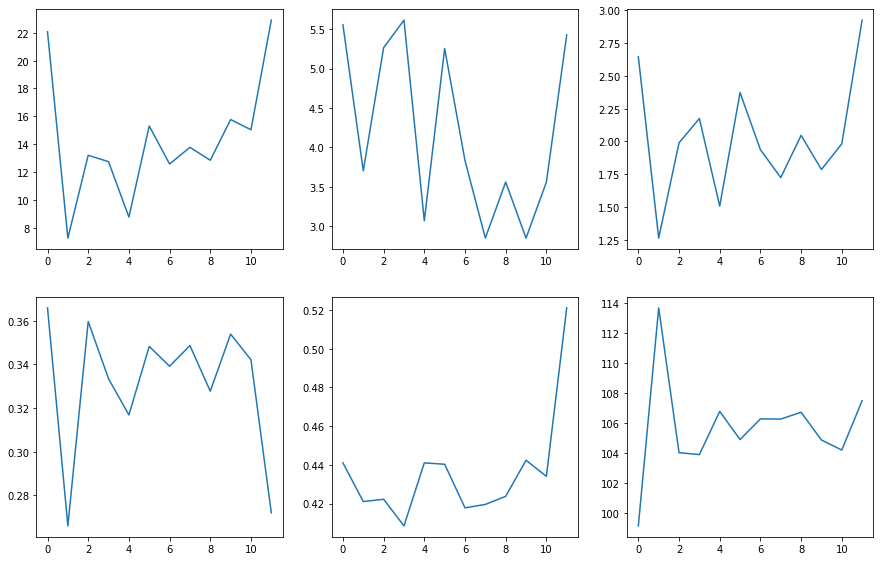

In [176]:
plt.figure(figsize = (15,15))
plt.subplot(3,3,1)
plt.plot(points_mean.to_numpy())

plt.subplot(3,3,2)
plt.plot(assist_mean.to_numpy())

plt.subplot(3,3,3)
plt.plot(turnover_mean.to_numpy())

plt.subplot(3,3,4)
plt.plot(three_percent_mean.to_numpy())

plt.subplot(3,3,5)
plt.plot(FGpercent_mean.to_numpy())

plt.subplot(3,3,6)
plt.plot(defense_mean.to_numpy())


In [194]:
print("points correlation: ", sc.pearsonr(points_mean['mean'].to_list(), range(0, len(points_mean.to_numpy())))[0])
print("assists correlation: ", sc.pearsonr(assist_mean['mean'].to_list(), range(0, len(assist_mean.to_numpy())))[0])
print("turnover correlation: ", sc.pearsonr(turnover_mean['mean'].to_list(), range(0, len(turnover_mean.to_numpy())))[0])
print("3 point percent correlation: ", sc.pearsonr(three_percent_mean['mean'].to_list(), range(0, len(three_percent_mean.to_numpy())))[0])
print("FG percent correlation: ", sc.pearsonr(FGpercent_mean['mean'].to_list(), range(0, len(FGpercent_mean.to_numpy())))[0])
print("defensive rating correlation: ", sc.pearsonr(defense_mean['mean'].to_list(), range(0, len(defense_mean.to_numpy())))[0])

points correlation:  0.30505604172511797
assists correlation:  -0.36084322304929134
turnover correlation:  0.21029064110413706
3 point percent correlation:  -0.13008896740141485
FG percent correlation:  0.489790606267434
defensive rating correlation:  0.09985798342092878
